# **Data Analysis Project: Air Quality from Tiantan**
- **Nama:** Mhd. Rahul Bhatara Guru
- **Email:** rahulbhataraguru@gmail.com
- **ID Dicoding:** https://www.dicoding.com/users/rahulbhatara

## **Define Questions**

- **How does weather temperature change throughout the year?**
- **How is the correlation between air temperature (TEMP) and ozone (O3) quality in the atmosphere?**

## **Import Lirary**

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import os

## **Data Wrangling**

### Gathering Data

In [24]:
csv_files = [file for file in os.listdir('data/') if file.endswith('.csv')]
dataframes = []
for file in csv_files:
    file_path = os.path.join('data/', file)
    d = pd.read_csv(file_path)
    dataframes.append(d)    

df = pd.concat(dataframes, ignore_index=True)

### Assessing Data

Text(0, 0.5, 'Percentage of Missing Data (%)')

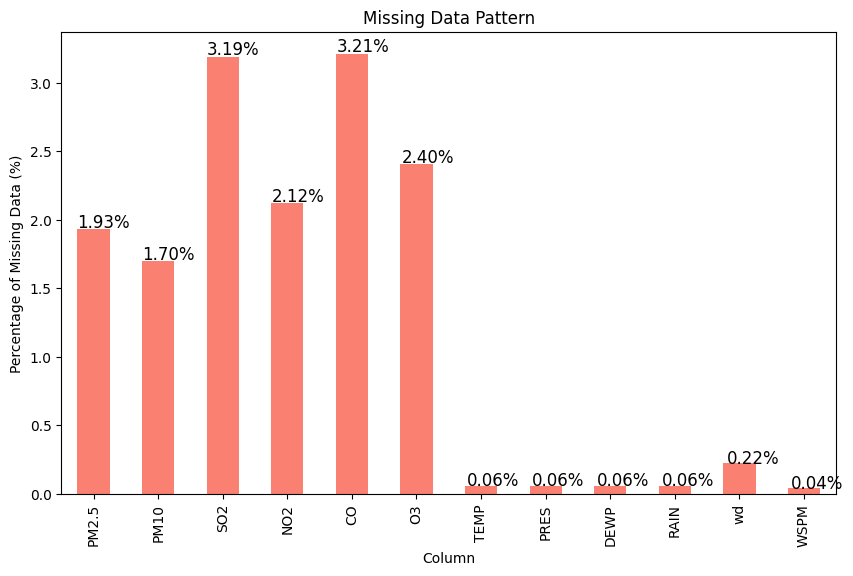

In [25]:
missing_percentage = df.isnull().mean() * 100
missing_percentage = missing_percentage[missing_percentage > 0]
plt.figure(figsize=(10, 6))
ax = missing_percentage.plot(kind='bar', color='salmon')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() * 1.005, p.get_height() * 1.005), fontsize=12)
plt.title('Missing Data Pattern')
plt.xlabel('Column')
plt.ylabel('Percentage of Missing Data (%)')

- **There is a relatively small percentage of missing data for each pollutant and weather parameter, which indicates that the dataset is still relatively complete.**
- **The percentage of missing data for pollution parameters is higher compared to weather parameters.**

### Cleaning Data

In [26]:
df_fixed = df.copy()
columns_numerik_to_fill = df_fixed.select_dtypes(include=['float64']).columns
for col in columns_numerik_to_fill:
    df_fixed[col].fillna(df_fixed[col].mean(), inplace=True)
columns_object = df_fixed.select_dtypes(include=['object']).columns
for col in columns_object:
    df_fixed[col].fillna(df_fixed[col].mode()[0], inplace=True)
df_fixed.isnull().sum()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6548\1825020440.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_fixed[col].fillna(df_fixed[col].mean(), inplace=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6548\1825020440.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

- **Missing values will be filled with the average value for integer-type parameters, while object-type parameters will be filled with the mode of the data**

## **Exploratory Data Analysis (EDA)**

### Average temperature analysis for each month of the year

In [27]:
df_fixed['date'] = pd.to_datetime(df_fixed[['year', 'month', 'day']])
monthly_temp = df_fixed.groupby(df_fixed['date'].dt.to_period('M'))['TEMP'].mean().reset_index()
monthly_temp['month'] = monthly_temp['date'].dt.month
print(monthly_temp.head())


      date       TEMP  month
0  2013-03   6.256989      3
1  2013-04  12.632361      4
2  2013-05  21.929301      5
3  2013-06  23.823611      6
4  2013-07  27.485215      7


### Weakly Average Air Temperature Time Series

In [28]:
df_fixed['date'] = pd.to_datetime(df_fixed[['year', 'month', 'day']])
df_fixed['week'] = df_fixed['date'].dt.to_period('W')
weekly_stats = df_fixed.groupby('week').agg({
    'TEMP': ['mean', 'min', 'max'],
    'O3': ['mean', 'min', 'max']
})
weekly_stats.columns = ['TEMP_mean', 'TEMP_min', 'TEMP_max', 'O3_mean', 'O3_min', 'O3_max']
weekly_stats = weekly_stats.reset_index()
print(weekly_stats.head())


                    week  TEMP_mean  TEMP_min  TEMP_max    O3_mean  O3_min  \
0  2013-02-25/2013-03-03   2.268056      -5.4      16.6  39.680556     4.0   
1  2013-03-04/2013-03-10   8.245238      -2.8      21.7  79.839286     8.0   
2  2013-03-11/2013-03-17   6.582738      -1.2      15.9  77.595238     9.0   
3  2013-03-18/2013-03-24   4.603571      -5.1      11.7  49.810134     4.0   
4  2013-03-25/2013-03-31   7.305952      -1.9      19.3  43.305675     4.0   

   O3_max  
0    83.0  
1   107.0  
2   107.0  
3   107.0  
4   107.0  


## **Visualization & Explanatory Analysis**

### 1. How does weather temperature change throughout the year?

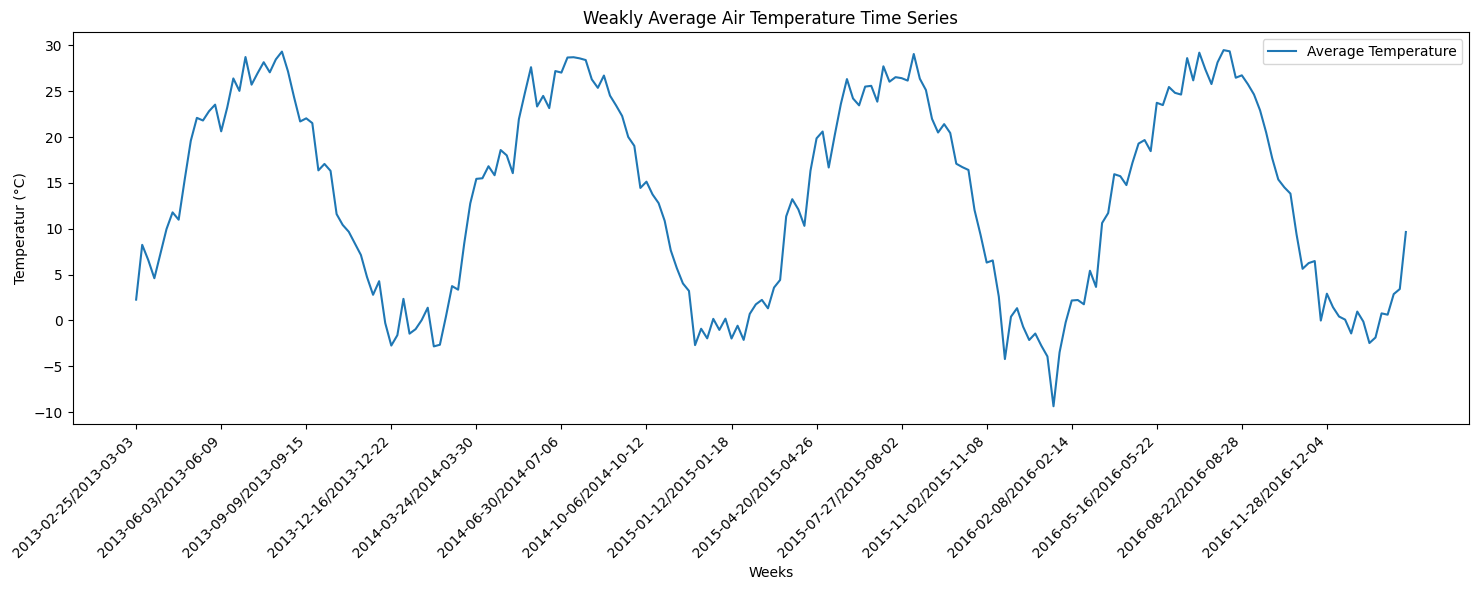

In [29]:
plt.figure(figsize=(15, 6))
plt.plot(range(len(weekly_stats)), weekly_stats.TEMP_mean, label='Average Temperature')

num_ticks = 15
step = len(weekly_stats) // num_ticks
tick_locations = np.arange(0, len(weekly_stats), step)
tick_labels = weekly_stats['week'].astype(str).iloc[tick_locations]

plt.xticks(tick_locations, tick_labels, rotation=45, ha='right')

plt.title('Weakly Average Air Temperature Time Series')
plt.xlabel('Weeks')
plt.ylabel('Temperatur (°C)')
plt.legend()
plt.tight_layout()
plt.show()

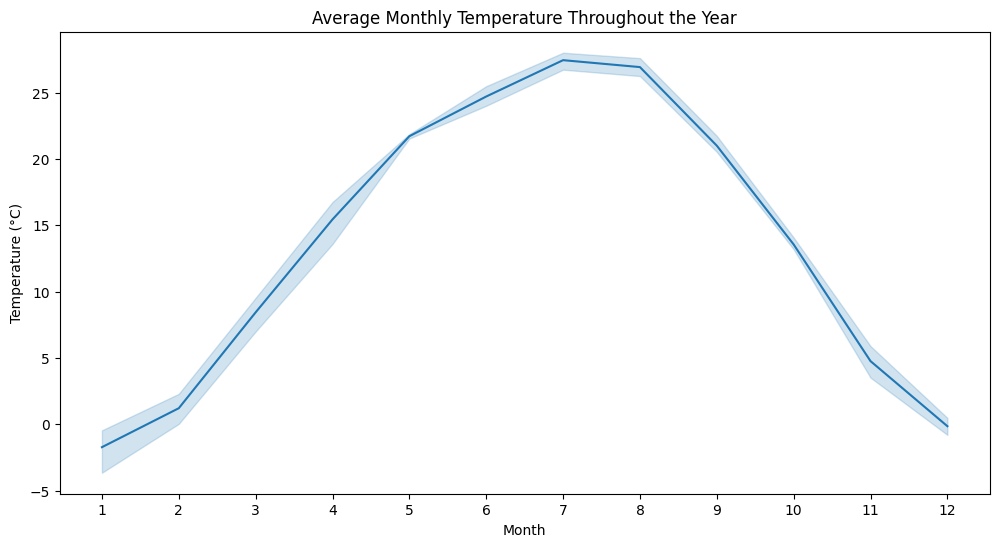

In [30]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_temp, x='month', y='TEMP')
plt.title('Average Monthly Temperature Throughout the Year')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.xticks(range(1, 13))
plt.show()

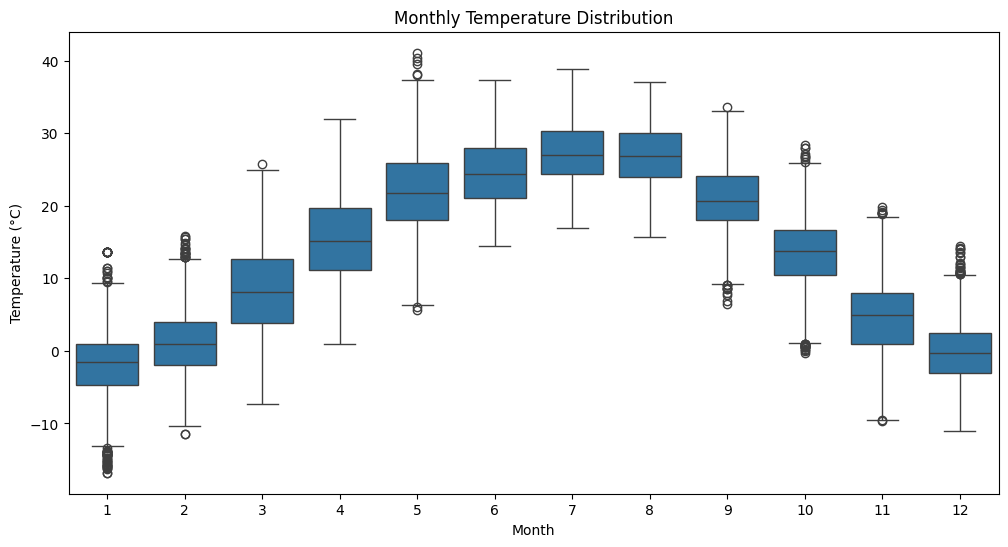

In [31]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_fixed, x=df_fixed['date'].dt.month, y='TEMP')
plt.title('Monthly Temperature Distribution')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.show()

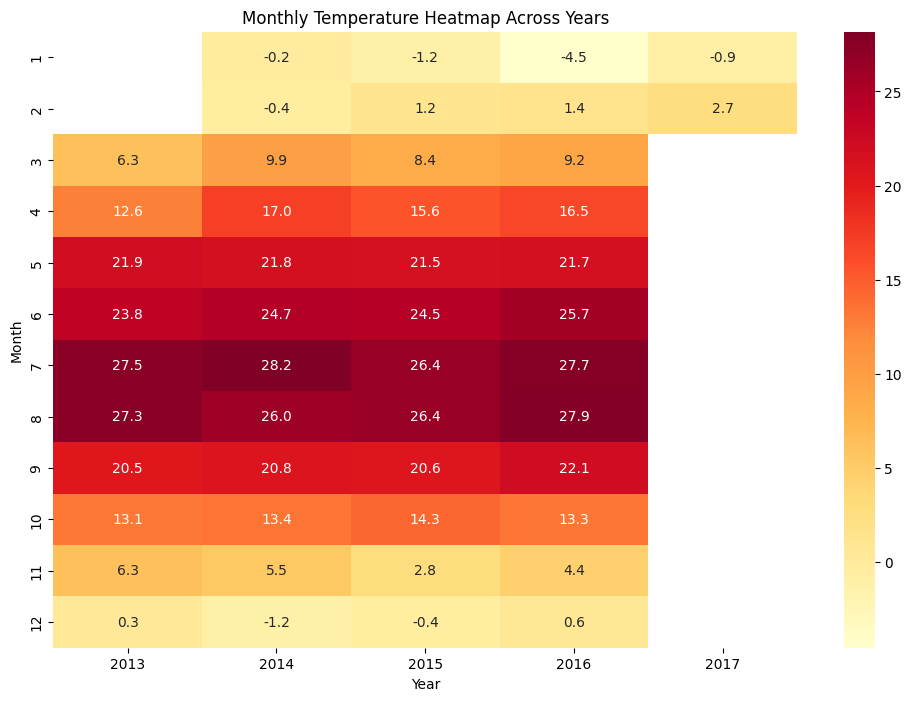

In [32]:
df_fixed['year'] = df_fixed['date'].dt.year
df_fixed['month'] = df_fixed['date'].dt.month
temp_monthly = df_fixed.groupby(['year', 'month'])['TEMP'].mean().reset_index()
temp_pivot = temp_monthly.pivot(index='month', columns='year', values='TEMP')
plt.figure(figsize=(12, 8))
sns.heatmap(temp_pivot, cmap='YlOrRd', annot=True, fmt='.1f')
plt.title('Monthly Temperature Heatmap Across Years')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()

Seasonal Temperature Fluctuations: Observations from the Weekly Average Air Temperature Time Series plot reveal significant temperature variations throughout each year. Notably, temperatures consistently exhibit a low point at the beginning of each year, followed by a steady increase until mid-year, and subsequently decline towards the end of the year.

### 2. How is the correlation between air temperature (TEMP) and ozone (O3) quality in the atmosphere?

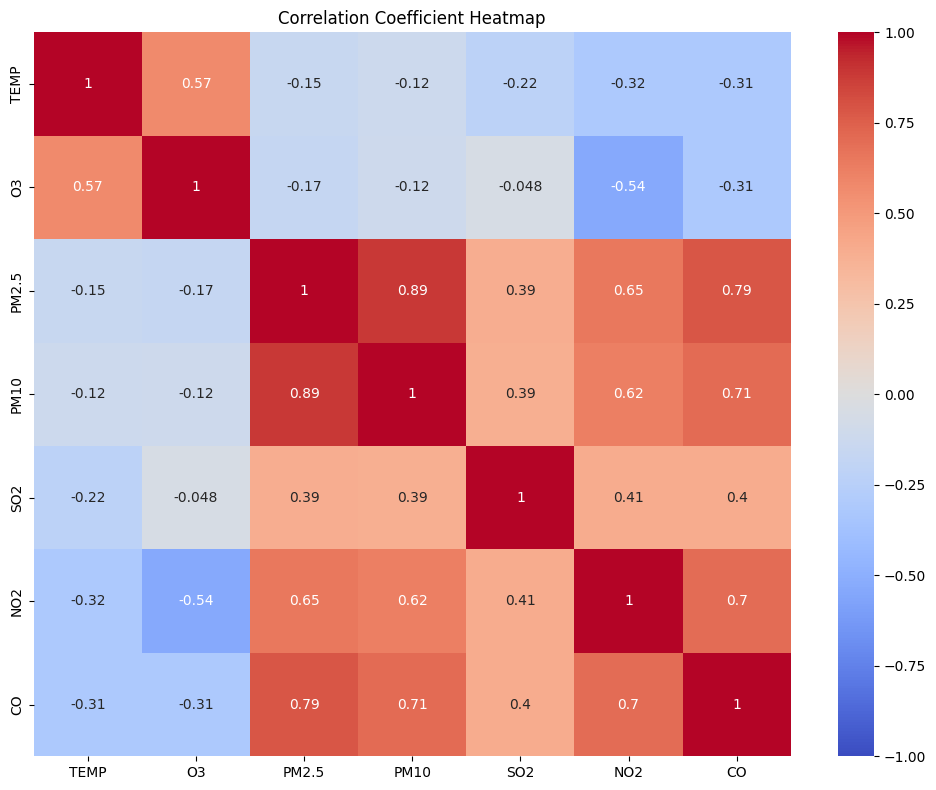

Correlation coefficient between Temperature (TEMP) and Ozone (O3): 0.5719


In [33]:
variables = ['TEMP', 'O3', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO']
correlation_matrix = df_fixed[variables].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Coefficient Heatmap')
plt.tight_layout()
plt.show()

print(f"Correlation coefficient between Temperature (TEMP) and Ozone (O3): {correlation_matrix.loc['TEMP', 'O3']:.4f}")

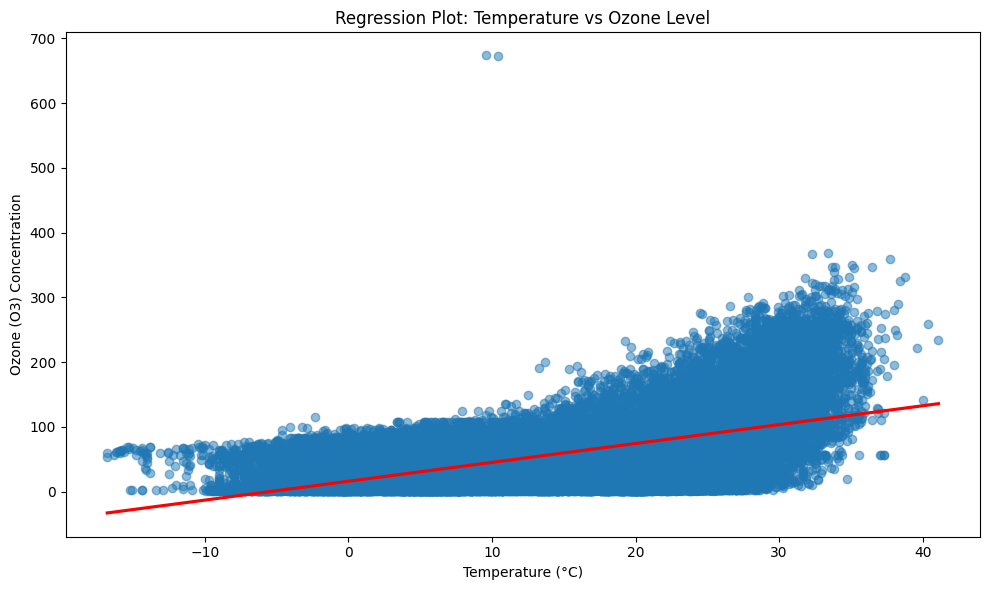

In [34]:
plt.figure(figsize=(10, 6))
sns.regplot(x='TEMP', y='O3', data=df_fixed, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Regression Plot: Temperature vs Ozone Level')
plt.xlabel('Temperature (°C)')
plt.ylabel('Ozone (O3) Concentration')
plt.tight_layout()
plt.show()

**Positive Correlation Between Temperature and Ozone Levels:** The analysis of the Correlation Coefficient heatmap and the Regression Plot indicates a positive relationship between Temperature (TEMP) and Ozone (O3) levels. This suggests that as temperatures rise, there is a corresponding increase in Ozone concentrations.

## **Conclusion**

### Question 1: How does weather temperature change throughout the year?
#### - The analysis of the Weekly Average Air Temperature Time Series plot reveals a distinct seasonal pattern in temperature fluctuations, characterized by low temperatures at the start of the year, a gradual increase peaking around mid-year, followed by a decline towards year-end. This cyclical behavior underscores the influence of seasonal changes on temperature dynamics.


### Question 2 How is the correlation between air temperature (TEMP) and ozone (O3) quality in the atmosphere?
#### - Furthermore, the relationship between air temperature (TEMP) and ozone levels (O3) is marked by a positive correlation. As temperatures rise, ozone concentrations tend to increase correspondingly. This finding highlights the potential implications of rising temperatures on air quality, emphasizing the need for ongoing monitoring and management of ozone levels in the context of climate change.